In [1]:
# BRASILIA - Ridge Regression

In [2]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 6,4
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (6,4)})

import warnings
warnings.simplefilter(action='ignore')

In [3]:
df = pd.read_excel(r"Brasilia_ML_Std.xls")
df.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_DF
0,-0.717529,-0.626223,-0.666778,-0.196953,-0.477565,1
1,-0.838328,-0.807425,-0.792635,0.885682,-0.286445,1
2,-0.516970,-0.574450,-0.631149,-1.795652,1.239965,1
3,-0.777291,-0.761828,-0.761104,-1.063986,0.201244,1
4,-0.716441,-0.647552,-0.681930,-0.602536,-0.301323,1


In [4]:
# Predicting Cartel
# define X and y
X = df.drop("Cartel_DF",axis = 1)
y = df.Cartel_DF

In [5]:
X.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis
0,-0.717529,-0.626223,-0.666778,-0.196953,-0.477565
1,-0.838328,-0.807425,-0.792635,0.885682,-0.286445
2,-0.516970,-0.574450,-0.631149,-1.795652,1.239965
3,-0.777291,-0.761828,-0.761104,-1.063986,0.201244
4,-0.716441,-0.647552,-0.681930,-0.602536,-0.301323


In [6]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
# grid search hyperparameters for Ridge regression
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2')
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
# define grid
grid = dict()
grid['C'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring="accuracy", cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('accuracy: %.3f' % results.best_score_)
print('Best value for C: %s' % results.best_params_)

accuracy: 0.939
Best value for C: {'C': 0.99}


In [8]:
logreg = LogisticRegression(penalty='l2', C= 0.99)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.99)

In [9]:
print(logreg.coef_, logreg.intercept_)

[[-0.22180153  0.18464202 -3.4487785  -0.33068277  0.26824481]] [0.43933764]


In [10]:
# make class predictions for the testing set
y_pred = logreg.predict(X_test)

In [11]:
#calculate the percentage of ones
Percentage_of_ones = y_test.mean()
print('Null Accuracy:', Percentage_of_ones)

Null Accuracy: 0.5918367346938775


In [12]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
#mean_squared_error(y_test, y_pred_class)

0.8639455782312925


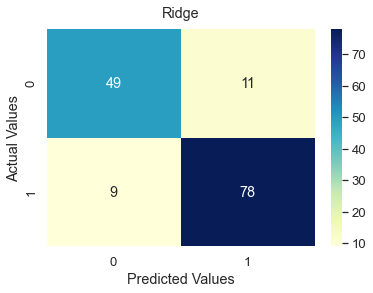

In [29]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.2) # Adjust to fit
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Ridge', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_Ridge_Brasilia.png', dpi=600)
plt.savefig('CM_Ridge_Brasilia.eps', format='eps')

In [14]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        60
           1       0.88      0.90      0.89        87

    accuracy                           0.86       147
   macro avg       0.86      0.86      0.86       147
weighted avg       0.86      0.86      0.86       147



In [15]:
# store the predicted probabilities for class 1
from sklearn.metrics import roc_curve
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

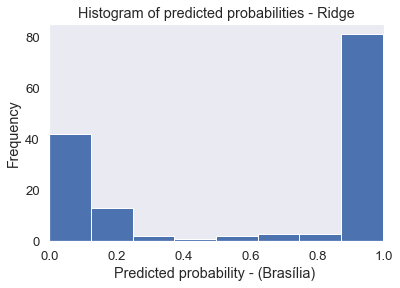

In [16]:
# histogram of predicted probabilities
plt.hist(y_pred_proba, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities - Ridge')
plt.xlabel('Predicted probability - (Brasília) ')
plt.ylabel('Frequency')
plt.grid(False)
plt.savefig('Histogram_Ridge_Brasilia.eps', format='eps')
## 

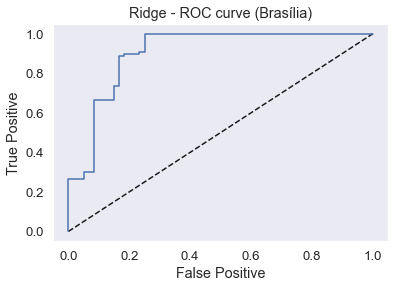

In [17]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Ridge - ROC curve (Brasília)')
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_Ridge_Brasilia.eps', format='eps')

In [18]:
from sklearn.metrics import roc_curve
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [19]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
auc = cross_val_score(logreg, X_test, y_test, cv=5, scoring='roc_auc').mean()
print('AUC:',auc)

AUC: 0.9042483660130719


In [20]:
import eli5
from eli5.sklearn import PermutationImportance

In [21]:
perm = PermutationImportance(logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3279 ± 0.0379,Price_sd
0.0095 ± 0.0109,Price_skewness
0.0054 ± 0.0054,SPD
0 ± 0.0000,Price_kurtosis
0 ± 0.0000,CV


In [22]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tpr[thresholds > threshold][-1])
    print('specificity:', 1 - fpr[thresholds > threshold][-1])

In [23]:
evaluate_threshold(0.5)

sensitivity: 0.896551724137931
specificity: 0.8166666666666667


In [24]:
evaluate_threshold(0.6)

sensitivity: 0.8850574712643678
specificity: 0.8166666666666667


In [25]:
evaluate_threshold(0.7)

sensitivity: 0.735632183908046
specificity: 0.8333333333333334


In [26]:
evaluate_threshold(0.8)

sensitivity: 0.735632183908046
specificity: 0.8333333333333334


In [27]:
evaluate_threshold(0.9)

sensitivity: 0.735632183908046
specificity: 0.8333333333333334


In [28]:
evaluate_threshold(0.99)

sensitivity: 0.011494252873563218
specificity: 1.0
